In [297]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline

In [389]:
def oriented_bounding_box(points):
    p_mean = points.mean(axis=0)
    points -= p_mean
    cov = np.cov(points.T)
    w, v = np.linalg.eig(cov)
    
    p1 = p_mean.copy()
    p2 = p_mean.copy()
    p3 = p_mean.copy()
    p4 = p_mean.copy()
    
    for i in range(points.shape[1]):        
        vi = v[:, i]
        
        pi = points.dot(vi)
        
        px = pi.min() * vi
        py = pi.max() * vi
        
        #diff = 0.5 * (abs(p1) + abs(p2))
        
        #p_min -= 0.5 * diff
        #p_max += 0.5 * diff
        
        p1 += px
        p2 += py
        p3 -= px
        p4 -= py
    
    points += p_mean
    return p1, p2, p3, p4

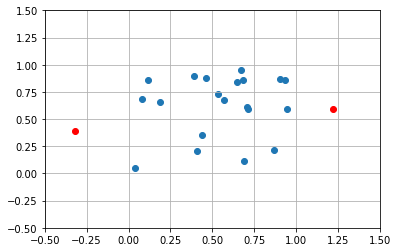

In [394]:
#points = np.random.multivariate_normal(np.zeros(3), np.diag([100,50,10]), 20)
points = np.random.uniform(size=(20, 2))

p1, p2, p3, p4 = oriented_bounding_box(points)

plt.scatter(points[:,0], points[:,1])
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()

plt.scatter(p1[0], p1[1], c='red')
plt.scatter(p2[0], p2[1], c='red')
#plt.scatter(p3[0], p3[1], c='red')
#plt.scatter(p4[0], p4[1], c='red')

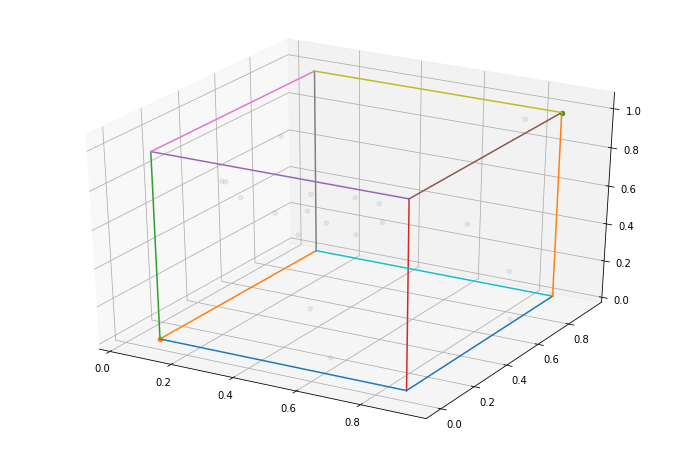

In [372]:
points = np.random.multivariate_normal(np.zeros(3), np.diag([100,50,10]), 20)
points = np.random.uniform(size=(20, 3))

p_min, p_max = oriented_bounding_box(points)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], alpha=0.1)

lines = []

diff = p_max - p_min
dx = diff[0]
dy = diff[1]
dz = diff[2]

px = p_min[0]
py = p_min[1]
pz = p_min[2]

lines.append(np.array([[px,py,pz], [px+dx,py,pz]]))
lines.append(np.array([[px,py,pz], [px,py+dy,pz]]))
lines.append(np.array([[px,py,pz], [px,py,pz+dz]]))

lines.append(np.array([[px+dx,py,pz+dz], [px+dx,py,pz]]))
lines.append(np.array([[px+dx,py,pz+dz], [px,py,pz+dz]]))
lines.append(np.array([[px+dx,py,pz+dz], [px+dx,py+dy,pz+dz]]))

lines.append(np.array([[px,py+dy,pz+dz], [px,py,pz+dz]]))
lines.append(np.array([[px,py+dy,pz+dz], [px,py+dy,pz]]))
lines.append(np.array([[px,py+dy,pz+dz], [px+dx,py+dy,pz+dz]]))

lines.append(np.array([[px+dx,py+dy,pz], [px,py+dy,pz]]))
lines.append(np.array([[px+dx,py+dy,pz], [px+dx,py,pz]]))
lines.append(np.array([[px+dx,py+dy,pz], [px+dx,py+dy,pz+dz]]))

for l in lines:
    ax.plot([l[0][0], l[1][0]],
            [l[0][1], l[1][1]],
            [l[0][2], l[1][2]])
    
ax.scatter(p_min[0], p_min[1], p_min[2])
ax.scatter(p_max[0], p_max[1], p_max[2])
#ax.plot([p_min[0], p_max[0]], [p_min[1], p_max[1]], [p_min[2], p_max[2]])